# LangSmith API Key 로드

In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

# Langsmith로 프로젝트 추적 설정

In [2]:
from utils import logging

logging.langsmith("LCEL")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchainBasic


# LCEL 이란?

LangChain Expression Language (LCEL)은 LangChain 라이브러리에서 제공하는 선언적 방식의 인터페이스로, 복잡한 LLM (Large Language Model) 애플리케이션을 구축하고 실행하기 위한 도구입니다. LCEL은 LLM, 프롬프트, 검색기, 메모리 등 다양한 컴포넌트를 조합하여 강력하고 유연한 AI 시스템을 만들 수 있게 해줍니다.

## 기본 구성 요소

LCEL은 다음과 같은 기본 구성 요소를 제공합니다.

    Runnable: 모든 LCEL 컴포넌트의 기본 클래스입니다.

    Chain: 여러 Runnable을 순차적으로 실행합니다.

    RunnableMap: 여러 Runnable을 병렬로 실행합니다.

    RunnableSequence: Runnable의 시퀀스를 정의합니다.

    RunnableLambda: 사용자 정의 함수를 Runnable로 래핑합니다.

# LCEL 기본 예제 실행해보기

 (프롬프트 + 모델 + 출력 파서)를 파이프라인으로 연결하여 간단한 체인 만들기

## 프롬프트 템플릿의 활용

from_template() 메소드를 사용하여 PromptTemplate 객체 생성

In [3]:
from utils.messages import stream_response
from langchain_core.prompts import PromptTemplate # 들어가서 예제 살펴보기

# template 정의
template = "{country}의 수도는 어디인가요?"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
prompt_template

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

input_variables는 PromptTemplate에서 사용되는 변수의 이름을 정의하는 리스트입니다.

In [4]:
# prompt 생성
prompt = prompt_template.format(country="대한민국")
prompt

'대한민국의 수도는 어디인가요?'

In [7]:
# prompt 생성
prompt = prompt_template.format(country="미국")
prompt

'미국의 수도는 어디인가요?'

In [5]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model='gpt-3.5-turbo',
    max_tokens=2048,
    temperature=0.1, # 0.0 ~ 0.2
)

### Chain 생성

#### LCEL(LangChain Expression Language)

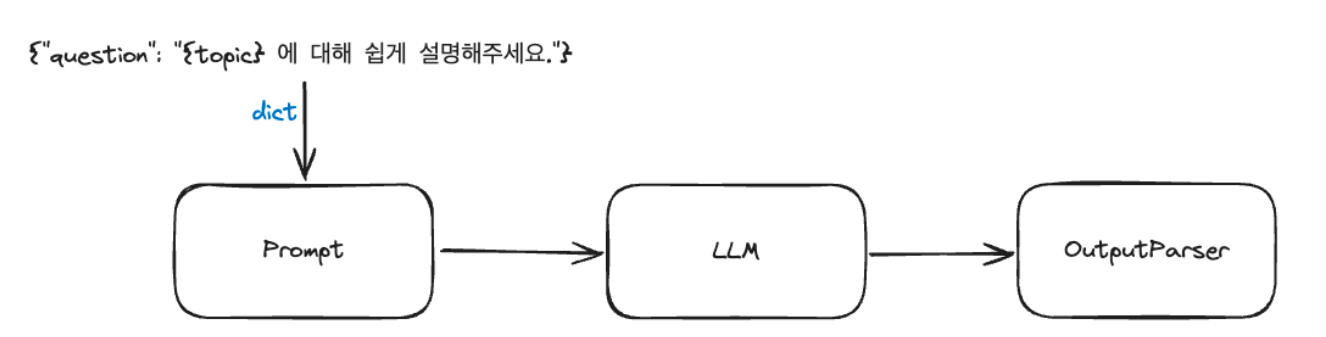

LCEL을 사용하여 다양한 구성 요소를 단일 체인으로 결합합니다.

```
chain = prompt | model | output_parser
```

구성요소/객체들을 파이프(|) 연산자로 연결

In [7]:
# prompt 를 PromptTemplate 객체로 생성합니다.
prompt = PromptTemplate.from_template("{topic} 에 대해 쉽게 설명해주세요.")

model = ChatOpenAI()
# 기본 값 확인 필요 : model(gpt-3.5-turbo), temperature(0.7), max_tokens(X), top_p(1.0), frequency_penalty(0.0), presence_penalty(0.0)

chain = prompt | model

#### invoke() 호출

python <mark>딕셔너리 형태로 입력값을 전달</mark>합니다.{키: 값}

invoke() 함수 호출 시, 입력값을 전달합니다.

In [8]:
input = {"topic": "인공지능 모델의 학습 원리"}

chain.invoke(input)

AIMessage(content='인공지능 모델의 학습 원리는 데이터를 활용하여 모델을 학습시키는 과정을 말합니다. 이 과정은 크게 입력 데이터를 받아들이고 처리하는 과정과 결과를 예측하고 오차를 줄이는 과정으로 나눌 수 있습니다.\n\n먼저, 모델은 입력 데이터를 받아들이고 각 데이터의 특징을 학습합니다. 이를 위해 입력 데이터를 숫자로 변환하여 모델에 입력하고, 모델은 입력된 데이터의 패턴을 학습하여 특정한 결과를 내놓습니다.\n\n그다음, 모델이 내놓은 결과와 실제 정답을 비교하여 오차를 계산하고 이 오차를 줄이기 위해 모델의 가중치를 조정합니다. 이러한 과정을 반복하여 모델이 실제 데이터에 대해 정확한 결과를 내놓을 수 있도록 학습시키는 것이 인공지능 모델의 학습 원리입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 292, 'prompt_tokens': 33, 'total_tokens': 325, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-40b950ee-4a15-4e35-89c3-1b6e85f74384-0', usage_metadata={'input_tokens': 33, 'output_tokens': 292, 'total_tokens': 325, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

#### 스트리밍

In [9]:
answer = chain.stream(input)

stream_response(answer)

인공지능 모델의 학습 원리는 데이터를 입력으로 받아들이고 이를 분석하여 패턴을 찾아내는 과정입니다. 모델은 초기에는 데이터를 임의의 가중치와 편향으로 처리하며, 이후에는 이러한 가중치와 편향을 조정하여 정확한 결과를 도출할 수 있도록 학습을 진행합니다.

학습은 손실 함수를 통해 모델의 예측 결과와 실제 값 사이의 차이를 계산하고, 이를 최소화하기 위해 가중치와 편향을 조정하는 과정을 반복합니다. 이러한 과정을 통해 모델은 데이터의 특성을 학습하고, 새로운 데이터에 대한 예측을 수행할 수 있게 됩니다.

#### 출력파서

chain에 출력 파서를 추가합니다.

<!-- 콤마, JSON, Dataframe?? -->

In [13]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

chain = prompt | model | output_parser

input = {"topic": "인공지능 모델의 학습 원리"}

chain.invoke(input) 

'인공지능 모델의 학습 원리는 데이터를 사용하여 패턴을 학습하는 과정입니다. 모델은 입력 데이터를 받아들이고 이를 처리하여 원하는 출력을 생성하려고 노력합니다. \n\n이때, 모델은 입력 데이터와 출력 데이터 사이의 관계를 파악하기 위해 가중치와 편향을 조정하며 학습을 진행합니다. 학습 과정은 손실 함수를 통해 모델의 예측값과 실제값 사이의 차이를 계산하고, 이 손실을 최소화하기 위해 모델의 가중치와 편향을 업데이트합니다.\n\n이렇게 반복적으로 학습을 진행하면 모델은 입력 데이터를 더 잘 처리하고 원하는 출력을 생성할 수 있도록 최적화됩니다. 이러한 과정을 통해 인공지능 모델은 데이터로부터 학습하여 문제를 해결하고 예측을 수행할 수 있습니다.'

In [14]:
answer = chain.stream(input)

stream_response(answer)

인공지능 모델의 학습 원리는 데이터를 입력으로 받아들이고 이를 가공하여 원하는 결과를 출력하는 과정입니다. 이때 모델은 입력 데이터와 출력 데이터 사이의 관계를 학습하여 최적의 결과를 도출합니다.

모델은 주어진 데이터를 기반으로 가중치(weight)와 편향(bias)을 조절하며 입력과 출력 간의 관계를 학습합니다. 이 과정은 학습 데이터를 사용하여 모델의 예측 결과와 실제 결과 간의 오차를 최소화하는 방향으로 이루어집니다.

이러한 학습 과정은 반복적으로 이루어지며, 모델은 학습 데이터를 계속해서 사용하여 가중치와 편향을 조정하면서 더 나은 성능을 발휘하도록 개선됩니다. 이렇게 학습된 모델은 새로운 데이터를 입력으로 받아들일 때도 정확한 결과를 출력할 수 있습니다.

## 템플릿을 변경하여 적용

In [31]:
template = """
    당신은 영어를 가르치는 10년차 영어 선생님입니다. 
    [상황]에 맞게 [FORMAT] 형식으로 영어 대화 예시를 작성해 주세요.

    [상황]
    {question}

    [FORMAT]
    - 영어 회화:
    - 한글 해석:
"""

prompt = PromptTemplate.from_template(template)
model = ChatOpenAI(model_name="gpt-4-turbo")
output_parser = StrOutputParser()

chain = prompt | model | output_parser


# 상황1 제시
answer = chain.stream({"question": "저는 식당에 가서 음식을 주문하고 싶어요"})
stream_response(answer)

    [영어 회화]
    Customer: Hi, I'd like to see the menu, please.
    Waiter: Of course! Here you go. Do you need a few minutes before ordering?
    Customer: Yes, please. Thank you.
    (A few minutes later)
    Customer: I'm ready to order now. I'll have the grilled salmon and a side of mashed potatoes.
    Waiter: Great choice! Would you like something to drink?
    Customer: Yes, I'll have a glass of white wine, please.
    Waiter: Perfect! I'll get your order started right away.

    [한글 해석]
    손님: 안녕하세요, 메뉴판 좀 볼 수 있을까요?
    웨이터: 물론입니다! 여기 있습니다. 주문하시기 전에 조금 시간이 필요하신가요?
    손님: 네, 부탁드립니다. 감사합니다.
    (몇 분 후)
    손님: 이제 주문할 준비가 되었습니다. 그릴에 구운 연어와 매시드 포테이토를 주문할게요.
    웨이터: 좋은 선택이세요! 음료는 무엇으로 하시겠습니까?
    손님: 네, 화이트 와인 한 잔 주세요.
    웨이터: 완벽해요! 바로 주문을 시작하겠습니다.

In [33]:
# 상황2 제시
answer = chain.stream({"question": "주유소에 가서 기름을 주유하고 싶어요"})
stream_response(answer)

- 영어 회화:
  Customer: Hi, could you fill it up with regular, please?
  Attendant: Sure thing. Do you want to pay here or at the counter inside?
  Customer: I'll pay at the counter.
  Attendant: Alright, it will just take a few minutes.

- 한글 해석:
  고객: 안녕하세요, 보통 휘발유로 가득 주유해 주시겠어요?
  주유소 직원: 물론입니다. 여기서 결제하시겠습니까, 아니면 안에 있는 카운터에서 결제하시겠습니까?
  고객: 카운터에서 결제할게요.
  주유소 직원: 알겠습니다, 잠시만 기다려 주세요.

# LCEL 인터페이스

사용자 정의 체인을 가능한 쉽게 만들 수 있도록, Runnable 프로토콜을 구현

이는 표준 인터페이스로, 사용자 정의 체인을 정의하고 표준 방식으로 호출하는 것을 쉽게 만듭니다. 

표준 인터페이스에는 다음이 포함됩니다.

- <mark>stream</mark>: 응답의 청크를 스트리밍합니다. -> 실시간 출력

- <mark>invoke</mark>: 입력에 대해 체인을 호출합니다. -> 호출

- <mark>batch</mark>: 입력 목록에 대해 체인을 호출합니다. -> 배치(단위 실행)

비동기 메소드도 있습니다.

- <mark>astream</mark>: 비동기적으로 응답의 청크를 스트리밍합니다. -> 비동기 스트림

- <mark>ainvoke</mark>: 비동기적으로 입력에 대해 체인을 호출합니다. -> 비동기 호출

- <mark>abatch</mark>: 비동기적으로 입력 목록에 대해 체인을 호출합니다. -> 비동기 배치

- <mark>astream_log</mark>: 최종 응답뿐만 아니라 발생하는 중간 단계를 스트리밍합니다.

In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

model = ChatOpenAI() # 인스턴스 생성
prompt = PromptTemplate.from_template("{topic} 에 대하여 3문장으로 설명해줘.") # 프롬프트 템플릿 생성
chain = prompt | model | StrOutputParser() # 프롬프트와 모델을 연결하여 대화 체인을 생성

## stream : 실시간 출력

chain 객체의 stream 메서드를 사용하여 토픽에 대한 스트림을 생성하고 반복

In [5]:
for token in chain.stream({"topic": "멀티모달"}):
    print(token, end="", flush=True) # 줄바꿈 X # (메모리의)버퍼를 즉시 비움

멀티모달은 여러 가지 다른 형태의 통신 방식을 함께 사용하여 정보를 전달하는 방법을 말합니다. 예를 들어 음성, 이미지, 텍스트 등 다양한 매체를 활용하여 정보를 전달할 수 있습니다. 멀티모달은 사용자에게 보다 풍부한 경험을 제공하고 상황에 맞는 최적의 통신 방식을 선택할 수 있는 장점이 있습니다.

## invoke : 호출

chain 객체의 invoke 메서드를 호출,  딕셔너리를 전달

In [10]:
chain.invoke({"topic": "ChatGPT"})

AIMessage(content='ChatGPT는 온라인 상에서 사람과 자연스럽게 대화하는 인공지능 챗봇입니다. 이 챗봇은 사용자의 질문에 대답하거나 대화를 이어가는데 사용됩니다. ChatGPT는 사용자와 상호작용하며 다양한 주제에 대해 대화를 나눌 수 있습니다. 이를 통해 사용자는 ChatGPT를 통해 정보를 얻거나 즐거운 대화를 즐길 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 22, 'total_tokens': 164, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-6b011817-d156-4750-b720-c7eedd97ccbe-0', usage_metadata={'input_tokens': 22, 'output_tokens': 142, 'total_tokens': 164, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

## batch : 배치(단위 실행)

chian 객체의 batch 메서드를 호출하여 여러 개의 딕셔너리를 포함하는 리스트를 인자로 받아 일괄(batch) 처리

In [11]:
chain.batch([{"topic": "twitter"}, {"topic": "Instagram"}])

[AIMessage(content='Twitter는 글자 수 제한이 있는 소셜 미디어 플랫폼으로, 사용자들이 280자 이내의 짧은 메시지를 공유하고 다른 사람들의 메시지에 반응할 수 있는 서비스입니다. 사용자들은 팔로워들과 소통하고 최신 소식을 공유하며 관심사에 관련된 내용을 탐색할 수 있습니다. 또한 해시태그를 통해 특정 주제나 이벤트에 관련된 글을 모아볼 수도 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 164, 'prompt_tokens': 20, 'total_tokens': 184, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-be36d10d-d942-44d1-82fd-feb89b157c95-0', usage_metadata={'input_tokens': 20, 'output_tokens': 164, 'total_tokens': 184, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
 AIMessage(content='Instagram은 사진과 동영상을 공유하고 소셜 네트워크를 통해 소통하는 앱입니다. 사용자는 자신의 프로필을 만들고 팔로우하거나 팔로워를 늘리며 다른 사람들의 게시물을 좋아하고 댓글을 달 수 있습니다. 또한 해시태그를 사용하여 관심사나 주제별로 검색할 수도 있습니다. Instagra

max_concurrency 매개변수를 사용하여 동시 요청 수를 설정할 수 있습니다.

config 딕셔너리는 max_concurrency 키를 통해 동시에 처리할 수 있는 최대 작업 수를 설정합니다. 

여기서는 최대 3개의 작업을 동시에 처리하도록 설정되어 있습니다.

In [12]:
chain.batch(
    [
        {"topic":"마법사의 돌"},
        {"topic":"비밀의 방"},
        {"topic":"아즈카반의 죄수"},
        {"topic":"불사조 기사단"},
        {"topic":"혼혈 왕자"},
        {"topic":"죽음의 성물"},
    ],
    config={"max_concurrency":3},
)

[AIMessage(content='"마법사의 돌"은 할리 포터 시리즈의 첫 번째 책으로, 해리 포터가 호그와트 마법학교에 입학하고 마법 세계에 녹아들어가는 이야기를 다룹니다. 이 책에서 해리는 자신이 마법사임을 깨닫고, 자신의 과거와 가족에 대한 비밀을 알아가며 모험을 떠납니다. 또한, 해리와 그의 친구들이 악당 볼드모트에 맞서 싸우는 모습도 그려지는데, 이를 통해 용기와 우정의 소중함을 배울 수 있습니다. 전체적으로, "마법사의 돌"은 마법과 모험, 우정과 성장을 다룬 판타지 소설로, 많은 독자들에게 사랑받고 있는 작품입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 273, 'prompt_tokens': 27, 'total_tokens': 300, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-11441469-60b2-4432-ace9-ddf66b38a720-0', usage_metadata={'input_tokens': 27, 'output_tokens': 273, 'total_tokens': 300, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
 AIMessage(content='비밀의 방은 다른 사람들에게 알리기 싫은 비밀을 감추거나 보호하기 위해 사용되는 공간을 말합니다. 일반적으로 비밀의 방은 잠금

## async stream : 비동기 스트림

In [15]:
async for token in chain.astream({"topic": "커피"}):
    print(token, end="", flush=True)

content='' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='커피' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='는' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content=' 커피' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='나' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='무' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='의' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content=' 씨' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='앗' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content='을' additional_kwargs={} response_metadata={} id='run-5b1a2e05-dbc2-480f-aff0-878cb6a227be'content

## async invoke : 비동기 호출

In [16]:
my_process = chain.ainvoke({"topic": "커피"})

await my_process # 비동기로 처리되는 프로세스가 완료될 때까지 기다림

AIMessage(content='커피는 원두를 갈아 내려 끓인 뜨거운 음료로, 신맛과 쌉싸름한 맛이 특징입니다. 커피에는 카페인이 함유되어 있어 일시적으로 에너지를 공급해주는 효과가 있습니다. 많은 사람들이 아침이나 피로할 때 커피를 마셔 활기를 되찾기도 합니다. 커피는 세계적으로 매우 인기 있는 음료이며, 다양한 종류와 풍미를 즐길 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 181, 'prompt_tokens': 24, 'total_tokens': 205, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-91407544-b6c9-493e-b03f-b9ecada74c01-0', usage_metadata={'input_tokens': 24, 'output_tokens': 181, 'total_tokens': 205, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

## async batch: 비동기 배치

In [17]:
my_abatch_process = chain.abatch(
    [{"topic": "아메리카노"}, {"topic": "라떼"}, {"topic": "카푸치노"}]
)

await my_abatch_process

[AIMessage(content='아메리카노는 에스프레소에 물을 추가한 커피 음료입니다. 보통 에스프레소와 물을 1:1의 비율로 섞어 만들어지며, 강렬한 풍미와 쌉쌀한 맛을 가지고 있습니다. 미국에서 많이 마시는 커피 음료로, 부드러운 맛을 선호하는 사람들에게 인기가 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 26, 'total_tokens': 160, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b5d3ac92-e746-45a6-a2e4-0d19128add95-0', usage_metadata={'input_tokens': 26, 'output_tokens': 134, 'total_tokens': 160, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
 AIMessage(content='라떼는 에스프레소에 스팀밀크를 추가한 음료로, 부드럽고 크리미한 맛이 특징입니다. 에스프레소의 진한 맛과 스팀밀크의 부드러운 풍미가 어우러져 즐길 수 있는 음료입니다. 라떼는 보통 아침이나 오후에 많이 즐겨지며, 커피 초보자부터 커피 전문가까지 다양한 사람들이 즐기는 음료입니다.', additional_kwargs={'refusal': None}, response_metadata

## Parallel(1) : 체인 병렬 처리

langchain_core.runnables 모듈의 RunnableParallel 클래스를 사용하여 두 가지 작업을 병렬로 실행

In [21]:
from langchain_core.runnables import RunnableParallel

# {country} 의 수도를 물어보는 체인 생성
chain1 = (
    PromptTemplate.from_template("{country}의 수도는 어디야?")
    | model
    | StrOutputParser()
)

# {country} 의 면적를 물어보는 체인 생성
chain2 = (
    PromptTemplate.from_template("{country}의 면적은 얼마야?")
    | model
    | StrOutputParser()
)

# 위의 2개 체인을 동시에 생성하는 병렬 실행 체인을 생성
combined = RunnableParallel(capital=chain1, area=chain2)

In [25]:
# chain1 실행
chain1.invoke({"country":"대한민국"})

'대한민국의 수도는 서울이다.'

In [24]:
# chain2 실행
chain2.invoke({"country":"대한민국"})

'대한민국의 총 면적은 약 100,363 제곱킬로미터 입니다.'

In [26]:
# 병렬 실행 체인을 실행
combined.invoke({"country": "대한민국"})

{'capital': '대한민국의 수도는 서울이다.', 'area': '대한민국의 총 면적은 약 100,363 제곱 킬로미터입니다.'}

## Parallel(2) : 배치 병렬 처리

chain1.batch 함수는 여러 개의 딕셔너리를 포함하는 리스트를 인자로 받아, 각 딕셔너리에 있는 "topic" 키에 해당하는 값을 처리

In [27]:
# chain1의 배치 처리를 수행
chain1.batch([{"country":"대한민국"}, {"country":"미국"}])

['대한민국의 수도는 서울이에요.', '미국의 수도는 워싱턴 D.C.입니다.']

chain2.batch 함수는 여러 개의 딕셔너리를 리스트 형태로 받아, 일괄 처리(batch)를 수행

In [29]:
# chain2의 배치 처리를 수행
chain2.batch([{"country":"대한민국"}, {"country":"미국"}])

['대한민국의 총 면적은 약 100,363 제곱킬로미터입니다.', '미국의 총 면적은 약 9,834,000 제곱 킬로미터입니다.']

In [31]:
combined.batch([{"country":"대한민국"}, {"country":"미국"}])

[{'capital': '대한민국의 수도는 서울이다.', 'area': '대한민국의 면적은 약 100,210 km² 입니다.'},
 {'capital': '미국의 수도는 워싱턴 D.C.입니다.', 'area': '미국의 총 면적은 약 9,833만 제곱킬로미터입니다.'}]